In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


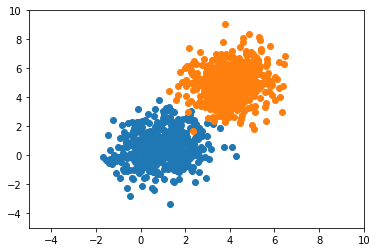

In [10]:
plt.figure(0)

plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])

plt.show()

In [11]:
data = np.concatenate((dist_01, dist_02))
print data.shape #Sanity check

print data.min(), data.max()

(1000, 2)
-3.34427016629 9.04562643305


In [16]:
def distance(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())

In [51]:
K = 4

clusters = {}

for ix in range(K):
    center = {
        'coords' : np.random.uniform(data.min(), data.max(), (data.shape[1], )),
        'history' : [],
        'points' : [],
    }
    clusters[ix] = center
print clusters

colors = ['red', 'yellow', 'cyan', 'orange']

{0: {'points': [], 'coords': array([ 3.74984981, -0.97227104]), 'history': []}, 1: {'points': [], 'coords': array([-2.29849744, -0.27077452]), 'history': []}, 2: {'points': [], 'coords': array([ 3.96125282,  2.49551345]), 'history': []}, 3: {'points': [], 'coords': array([ 7.47558998,  7.41393581]), 'history': []}}


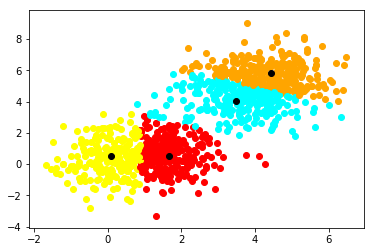

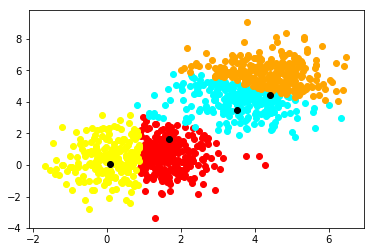

In [55]:
plt.figure(0)

for ix in range(data.shape[0]):
    d = []
    #Compute and Append distances
    for cx in range(K):
        d.append(distance(data[ix], clusters[cx]['coords']))
        
    #Get index of minimum distance cluster
    c_id = np.argmin(d)
    plt.scatter(data[ix, 0], data[ix, 1], color = colors[c_id])
    
    #Append point to cluster
    clusters[c_id]['points'].append(data[ix])
    
#Visualize cluster centers
for cx in range(K):
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color = 'black')
    
plt.figure(1)
#Update cluster centers
for cx in range(K):
    #Update history before anything else
    clusters[cx]['history'].append(clusters[cx]['coords'])
    
    #check if there is any empty cluster or not
    if len(clusters[cx]['points']) is not 0:
        #Reinitialize cluster center with mean
        clusters[cx]['coords'] = np.asarray(clusters[cx]['points']).mean(axis = 0)
        #Store all the points in a cluster in pts & plot
        pts = np.asarray(clusters[cx]['points'])
        plt.scatter(pts[:, 0], pts[:, 1], color = colors[cx])
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][0], color = 'black')
    #Empty points in cluster
    clusters[cx]['points'] = []
    
plt.show()    